In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df=pd.read_csv(r'C:\Users\acer\Downloads\StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [32]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [33]:
df['average score'] = (df['math score'] + df['writing score'] + df['reading score']) / 3
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group C,some high school,free/reduced,none,0,17,10,9.000000
1,female,group B,high school,free/reduced,none,8,24,23,18.333333
2,female,group B,some high school,free/reduced,none,18,32,28,26.000000
3,female,group B,some college,standard,none,11,38,32,27.000000
4,female,group C,some college,free/reduced,none,22,39,33,31.333333
...,...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81,89.000000
996,male,group A,some college,standard,completed,100,96,86,94.000000
997,male,group D,some college,standard,completed,100,97,99,98.666667
998,male,group E,associate's degree,free/reduced,completed,100,100,93,97.666667


# Number of Males and Females

In [34]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

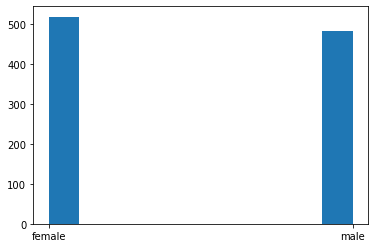

In [35]:
plt.hist(df['gender'])
plt.show()

# Student's Parental level of Education

In [36]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

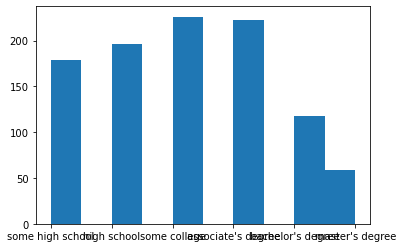

In [37]:
plt.hist(df['parental level of education'])
plt.show()

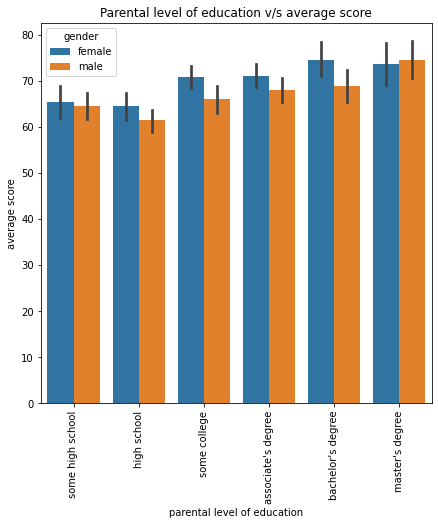

In [38]:
df['parental level of education'].value_counts()
plt.figure(figsize= (7,7))
plt.title('Parental level of education v/s average score')
plt.xticks(rotation = 90)
sns.barplot(x = 'parental level of education', 
            y = 'average score', 
            data = df,
            hue = 'gender',
            palette = 'tab10');

In [39]:
# Students with highly educated parents have higher average mark.

# Test preparation course V/s Average Score

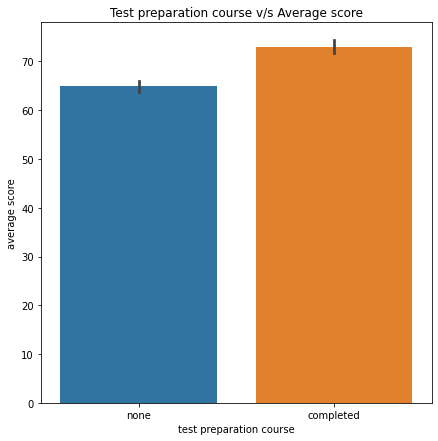

In [40]:
plt.figure(figsize= (7,7))

plt.title('Test preparation course v/s Average score')

sns.barplot(x = 'test preparation course', 
            y = 'average score', 
            data = df);

In [41]:
## Students who completed the Test preparation course have scored more

# Gender V/s Average Score

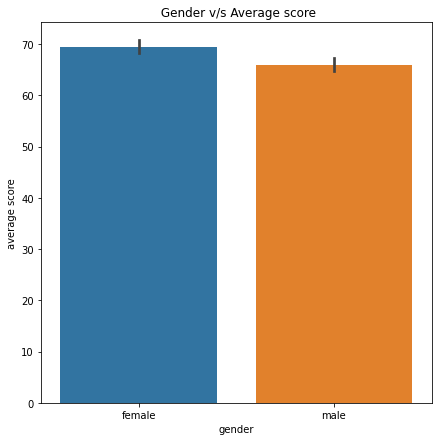

In [42]:
plt.figure(figsize= (7,7))

plt.title(' Gender v/s Average score')

sns.barplot(x = 'gender', 
            y = 'average score', 
            data = df);

In [43]:
## Females have scored higher average score than males

# Top 25% based on Math Score

In [44]:
df['math score'].quantile(0.75)

77.0

In [45]:
df.describe()

,math score,reading score,writing score,average score
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000,67.771667
std,15.569567,14.706436,15.226381,14.409003
min,0.000000,17.000000,10.000000,9.000000
25%,57.000000,59.000000,58.000000,58.333333
50%,66.000000,70.000000,69.000000,68.666667
75%,77.000000,79.250000,79.000000,77.750000
max,100.000000,100.000000,100.000000,100.000000


In [46]:
## Students who scored above 77 come under the top 25% category.

# Scoring Variation based on Gender

In [47]:
df1 = df.groupby(['gender'])[['reading score', 'math score', 'writing score']].mean()
df1

,reading score,math score,writing score
gender,,,
female,72.590734,63.376448,72.467181
male,65.545643,68.821577,63.446058


In [48]:
df1 = df.groupby(['gender'])[['reading score', 'math score', 'writing score']].std()
df1

,reading score,math score,writing score
gender,,,
female,14.411018,16.029928,14.844842
male,14.149594,14.556411,14.227225


In [49]:
# The high standard deviation indicates the marks are more spread out from the mean

# Scoring Variation based on Test preparation course

In [50]:
df1 = df.groupby(['test preparation course'])[['reading score', 'math score', 'writing score']].mean()
df1

,reading score,math score,writing score
test preparation course,,,
completed,74.175978,69.96648,74.684358
none,66.417445,63.78972,64.457944


In [51]:
df1 = df.groupby(['test preparation course'])[['reading score', 'math score', 'writing score']].std()
df1

,reading score,math score,writing score
test preparation course,,,
completed,13.537572,14.521847,13.236412
none,14.608896,15.705689,15.041667


In [52]:
# The data is spread out from the mean